<a href="https://colab.research.google.com/github/zahra-zarrabi/MachineLearning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [310]:
train_data = pd.read_csv('/content/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [311]:
#process
train_data = train_data.replace(['female','male'],[0, 1])
train_data = train_data.replace(['S','C','Q'],[0, 1, 2])
train_data=train_data.fillna(0)


In [312]:
X_train = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train = train_data[['Survived']]
X_train = np.array(X_train)
Y_train = np.array(Y_train) 


In [290]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(7,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='relu'),
                                    tf.keras.layers.Dense(7,activation='sigmoid'),
                                    # tf.keras.layers.Dense(32,activation='relu'),
                                    tf.keras.layers.Dense(2,activation='softmax')
])

In [245]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [251]:
output=model.fit(X_train,Y_train,epochs=300)
model.save('/content/model.h5')

Epoch 1/300
28/28 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8126
Epoch 2/300
28/28 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.7957
Epoch 3/300
28/28 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8070
Epoch 4/300
28/28 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.8114
Epoch 5/300
28/28 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.7957
Epoch 6/300
28/28 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8013
Epoch 7/300
28/28 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8002
Epoch 8/300
28/28 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8114
Epoch 9/300
28/28 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8025
Epoch 10/300
28/28 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8002
Epoch 11/

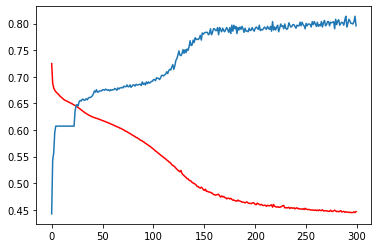

In [250]:
plt.plot(output.history['loss'],color='red')
plt.plot(output.history['accuracy'])

In [248]:
test_data = pd.read_csv('/content/test.csv')
Survived_data = pd.read_csv('/content/gender_submission.csv')
# Survived_data.head()
#process
test_data = test_data.replace(['female','male'],[0, 1])
test_data = test_data.replace(['S','C','Q'],[0, 1, 2])
test_data=test_data.fillna(0)

X_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_test = Survived_data[['Survived']]
X_test = np.array(X_test)
Y_test = np.array(Y_test) 

from keras import layers
layer = layers.Normalization()
layer.adapt(X_test)
X_test = layer(X_test).numpy()


In [249]:
acc=model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.9856


In [299]:
jack=np.array([3,0,30,2,1,72.0,1])
jack=jack.reshape(1,7)
y_pred=model.predict(jack)
prid=np.argmax(y_pred)
print('predict :',prid)

predict : 1


In [316]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
l_2=[]
for k in range(5):
  knc=KNeighborsClassifier(n_neighbors=5)
  knc.fit(X_train,Y_train)
  pred=knc.predict(X_test)
  test_score=knc.score(X_test,Y_test)
  l_2.append(test_score)
print(l_2)

[0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Data

In [321]:
#adaline 
from numpy.linalg import inv
class AdalineClassifier:
    def __init__(self):
        pass
    def fit(self,x_train,y_train):
        self.m=np.matmul(inv(np.matmul(x_train.T,x_train)),np.matmul(x_train.T,y_train))
    def predict(self,x_test):
        y_pred=np.matmul(x_test,self.m)
        # y_pred=np.round(y_pred)
        return y_pred
    def evaluate_mae(self,x_test,y_test):
        y_pred=np.matmul(x_test,self.m)
#         y_pred=np.round(y_pred
        # y_pred[np.where(y_pred < 1)] = 1
        # y_pred[np.where(y_pred >= 2)] = 2
        loss = np.mean(np.abs(np.subtract(y_test, y_pred)))
        return loss 

# x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.5)
model=AdalineClassifier()
model.fit(X_train,Y_train)
print('m',model.m)
y_pred=model.predict(X_test)
loss = model.evaluate_mae(X_test, Y_test)
print('loss :',loss)

m [[ 0.14138838]
 [-0.38761658]
 [ 0.00553244]
 [-0.02931985]
 [-0.00143308]
 [ 0.00351774]
 [ 0.09227475]]
loss : 0.36724509055067156


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

error nan


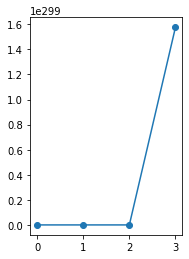

In [334]:
def fit(X_train,Y_train):
    lr=0.001
    epochs=15
    N=X_train.shape[0]
    
    W= np.random.rand(7,1)
    b = np.random.rand(1, 1)

    Error = []
    plt.title('Loss')

    for i in range(epochs):
        errors = []

        for n in range(N):

            y_pred = np.matmul(X_train[n:n+1],W)+b
            e= np.subtract(Y_train[n], y_pred)

            Y_pred = np.matmul(X_train, W) + b
            error = np.mean(np.abs(Y_train - Y_pred))
            errors.append(error)

            #update
            W = W + lr*X_train[n:n+1,:].T* e
            b = b + lr * e
        
        #plot loss
        Error.append(np.mean(errors))
        ax=plt.subplot(1, 2, 1)
        x = np.arange(0, len(Error))
        ax.clear()
        ax.plot(x, Error, marker='o')

    np.save('W',W)
    np.save('b',b)
    return W,b

def predict(X_test):
    w=np.load('W.npy')
    b=np.load('b.npy')
    y_pred=np.matmul(X_test,w)+b
    return y_pred

def evaluate(X_test,Y_test):
    w=np.load('W.npy')
    b=np.load('b.npy')
    y_pred = np.matmul(X_test, w) + b
    
    loss = np.mean(np.abs(np.subtract(Y_test, y_pred)))
    return loss

m,b = fit(X_train,Y_train)
y_pred=predict(X_test)
loss = evaluate(X_test, Y_test)
print('error',loss)
# loss, accuracy = evaluate(X_train, Y_train)
# print('error',loss)